## PROBLEM SET 1 - TAKE AT HOME (25 POINTS)

**You will lose all corresponding points if we can't access the implementation notebook URL or the Github URL. We will NOT message you. Do NOT invite the TAs to your Github repo (option 2 below) EARLIER than the morning of the day of the exam, since invites expire in 7 days.** 

## Introduction

In the last few years, the field of generative modeling has seen a lot of progress. The techniques that have been developed in this field are very useful for other tasks such as semi-supervised learning, representation learning, and reinforcement learning. In this problem statement we attempt to prepare you to understand the basics of a technique that has been very successful in generative modeling: Variational Autoencoders (VAEs). Understanding VAEs is  the key for you to get a head start with more advanced models such as [Stable Diffusion that are all the rage these days](https://clipdrop.co/stable-diffusion-turbo). 



## Task 1: Study what VAEs are and how they work (0 points)

Consult this [blog post](https://jaan.io/what-is-variational-autoencoder-vae-tutorial/) and its [2D VAE autoencoder implemenation for the MNIST dataset](https://github.com/jaanli/variational-autoencoder). 

## Task 2: Replicate the VAE for the MNIST dataset (25 points)

Implement the VAE model for the MNIST dataset and train it ensuring that you plot the loss curves for the training and validation sets and perform hyperparameter optimization on the size of the latent space as well as on the optimizer parameters. To all points you need to include as comments in the code or as markdown cells what each function in the code is doing. Don't be frugal in your commentary. (15 points)

Replicate the figure showing the final latent variable space shown below. Note that you will not produce the animated figure shown below but show only the final latent space $(z_1, z_2)$. (5 points)

Show VAE generated images for all digits 0-9 after model training. (5 points)

![](latent-variables.gif)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
  128/60000 [..............................] - ETA: 1:44 - loss: 543.7288

2023-12-15 23:34:05.540567: W tensorflow/c/c_api.cc:305] Operation '{name:'training_12/RMSprop/dense_145/bias/rms/Assign' id:4501 op device:{requested: '', assigned: ''} def:{{{node training_12/RMSprop/dense_145/bias/rms/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_12/RMSprop/dense_145/bias/rms, training_12/RMSprop/dense_145/bias/rms/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


60000/60000 [==============================] - 2s 36us/sample - loss: 194.6908 - val_loss: 173.3586
Epoch 2/50
  128/60000 [..............................] - ETA: 2s - loss: 170.2641

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-12-15 23:34:07.470569: W tensorflow/c/c_api.cc:305] Operation '{name:'loss_6/mul' id:4230 op device:{requested: '', assigned: ''} def:{{{node loss_6/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_6/mul/x, loss_6/dense_146_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


60000/60000 [==============================] - 2s 33us/sample - loss: 171.1091 - val_loss: 168.8180
Epoch 3/50
60000/60000 [==============================] - 2s 32us/sample - loss: 167.6566 - val_loss: 166.7504
Epoch 4/50
60000/60000 [==============================] - 2s 32us/sample - loss: 165.5198 - val_loss: 164.7633
Epoch 5/50
60000/60000 [==============================] - 2s 32us/sample - loss: 163.9668 - val_loss: 163.6172
Epoch 6/50
60000/60000 [==============================] - 2s 32us/sample - loss: 162.7642 - val_loss: 162.5779
Epoch 7/50
60000/60000 [==============================] - 2s 31us/sample - loss: 161.7614 - val_loss: 161.4688
Epoch 8/50
60000/60000 [==============================] - 2s 32us/sample - loss: 160.8556 - val_loss: 160.6582
Epoch 9/50
60000/60000 [==============================] - 2s 33us/sample - loss: 159.9590 - val_loss: 159.7803
Epoch 10/50
60000/60000 [==============================] - 2s 33us/sample - loss: 159.1632 - val_loss: 159.2183
Epoch 11/50

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-12-15 23:35:43.527303: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_143/BiasAdd' id:4101 op device:{requested: '', assigned: ''} def:{{{node dense_143/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_143/MatMul, dense_143/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


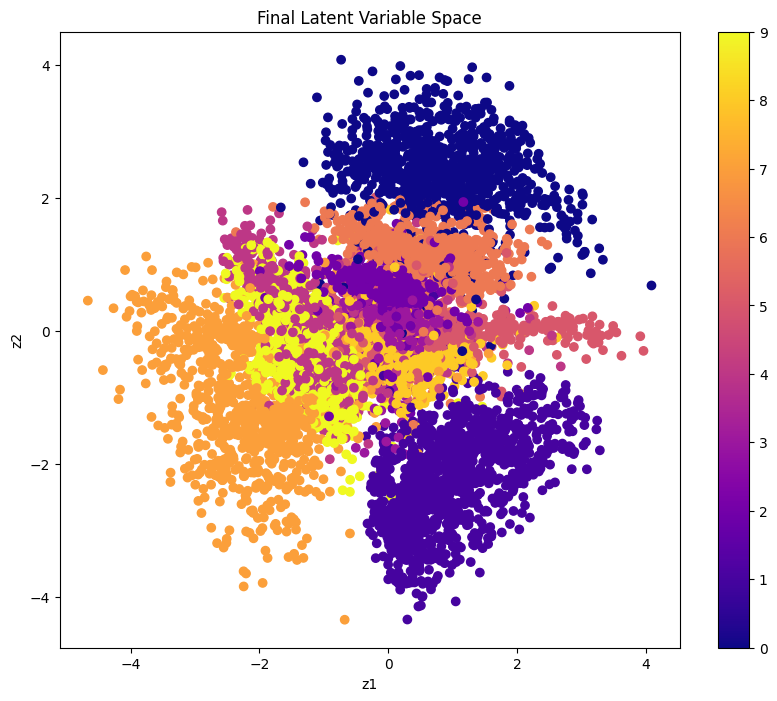

2023-12-15 23:35:43.852430: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_146_1/Sigmoid' id:4241 op device:{requested: '', assigned: ''} def:{{{node dense_146_1/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_146_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


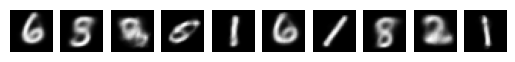

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
from keras import losses
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
from keras import optimizers
from keras.layers import Input, Dense, Lambda
import matplotlib.pyplot as plt
import numpy as np

disable_eager_execution()

# load the dataset & normalize values from 0 - 1
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.0
xTest = xTest.astype('float32') / 255.0


# turn images to 1D array
originalDim = 28 * 28

xTrain = xTrain.reshape((len(xTrain), originalDim))
xTest = xTest.reshape((len(xTest), originalDim))

# create the VAE model
def createVae(input_dim, latent_dim):

    # encoder
    inputs = Input(shape=(input_dim,))
    h = Dense(256, activation='relu')(inputs)
    z_mean = Dense(latent_dim)(h)
    z_log_var = Dense(latent_dim)(h)

    # re-parameterize to sample from latent
    def sampling(args):

        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon


    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # decoder
    decoder_h = Dense(256, activation='relu')
    decoder_mean = Dense(input_dim, activation='sigmoid')
    h_decoded = decoder_h(z)
    x_decoded_mean = decoder_mean(h_decoded)

    # define the loss function for VAE
    def vaeLoss(x, x_decoded_mean):

        xent_loss = originalDim * losses.binary_crossentropy(x, x_decoded_mean)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return xent_loss + kl_loss


    # build VAE model
    vae = Model(inputs, x_decoded_mean)
    vae.compile(optimizer='rmsprop', loss=vaeLoss)


    # encoder model
    encoder = Model(inputs, [z_mean, z_log_var])


    # generator model
    decoder_input = Input(shape=(latent_dim,))
    hDecodedd = decoder_h(decoder_input)
    xDecodedMeann = decoder_mean(hDecodedd)
    generator = Model(decoder_input, xDecodedMeann) 

    return vae, encoder, generator


# set random seed
np.random.seed(100)


# hyperparameters and set latent size
input_dim = 784  
latent_dim = 2  
epochs = 50
batch_size = 128


# create VAE model & train the VAE model
vae, encoder, generator = createVae(input_dim, latent_dim)
history = vae.fit(xTrain, xTrain,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(xTest, xTest))


# figure showing the final latent variable
z_test, _ = encoder.predict(xTest, batch_size=batch_size)
plt.figure(figsize=(10, 8))
plt.scatter(z_test[:, 0], z_test[:, 1], c=yTest, cmap='plasma')
plt.colorbar()
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Final Latent Variable Space')

plt.show()


# generate the new images for digits 0 - 9
num_samples = 10
for digit in range(10):

    # Sample from the latent space for each digit
    z_sample = np.array([[np.random.normal(), np.random.normal()]])
    generated_digit = generator.predict(z_sample)
    
    # reshape & plot generated image
    generated_digit = generated_digit.reshape(28, 28)
    plt.subplot(1, 10, digit + 1)
    plt.imshow(generated_digit, cmap='gray')
    plt.axis('off')

plt.show()

You have two implementation options: (1) All in one notebook (2) Github repo. 

### Option 1: All in one Colab notebook

You submit a single Colab notebook URL that contains all the code and the outputs. Your notebook should be self-contained and can be launched in Google Colab using a corresponding button at the top of the notebook. See the regression notebook in the course site for an example of such button. You **need to save all outputs in the notebook** so that the TAs can check that your code is working properly. 

### Option 2: Github repo 

If you prefer to work without notebooks, with containers or not, you can submit the implementation python scripts and version control your code in a private Github repo. You have to submit the Github URL and clearly document the way to launch the runtime / install requirements.txt and include all required figures in the README.md file. 

IMPORTANT: Ensure that the github repo remains private. If you submit a public github repo you will be held responsible for violating the honor code.